# Data Bootcamp Final Project: What are the gains from moving?

Poor countries have large masses of their population in rural, agriculture areas. Within these areas, they earn less relative to urban, non-agriculture areas. This observation begs the question: if people moved from rural to urban areas, would they reap gains in living standards. Or are the observed differences in livings standars simply and artifact of, say, differences in education or (unobserved) ability.

This is some thing I've thought a lot about in my research careeer. I'm going to use this project to explore a relativly new dataset that tracks those who actually move and the gains that they experince.

## Data Report

The key elements of the data are from the LSMS surveys from the World Bank. I'm going to focus on the Tanzania one as this has a tracking survey across years. That is it follows households if they move to a new location and measures what they are up to. Here are the key elements of the dataset:
- `SEC_B_C_D_E1_F_G1_U.dta` which appears to have basic demographic characteristics of those in the survey. This appears to be some big merged dataset. The orginal year 1 varibles are in the .zip (with year 1 stuff and then the individual B (age) and C which is the education modual. Within the education modual the questions relative to the merged stata file are plus one. So there is the sscq6 is HH_C07
- `HH_SEC_A.dta` appears to have the household weights
- `TZY1.HH.Consumption.dta` and `TZY2.HH.Consumption.dta` is the consumption module in year one and year two.
- `NPSY3.PANEL.KEY.dta` which contains the keys to be able to link, given a household id, across years.
- What is not clear is there appears to be `SEC_A`, etc. for year two. Need to investigate this.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "C://Users//mwaugh//Dropbox//Panel Tracking Surveys//Tanzania//Raw Data (2008-2009 and 2010-2011)"
file = path + "//TZY2.HH.Consumption.dta"

demo_tanz = pd.read_stata(file)

In [14]:
demo_tanz.head(10)

demo_tanz.columns

Index(['y2_hhid', 'foodbev', 'alctob', 'foodIN', 'foodOUT', 'utilities',
       'hhexpenses', 'health', 'transport', 'communic', 'recreat', 'educa',
       'other', 'expm', 'fisherb2c2', 'foodbevR', 'alctobR', 'foodINR',
       'foodOUTR', 'utilitiesR', 'hhexpensesR', 'healthR', 'transportR',
       'communicR', 'recreatR', 'educaR', 'otherR', 'expmR', 'hhid_2008',
       'hhsize', 'adulteq', 'hhweight', 'strata', 'urban', 'region', 'area',
       'mainland', 'intmonth', 'intyear', 'month', 'quarter'],
      dtype='object')

In [66]:
demo_tanz.hhweight.unique()

array([ 5152.95507812,  5212.38671875,  2564.01611328, ...,   253.61778259,
         258.77365112,   475.94454956])

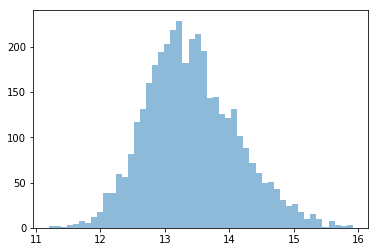

In [12]:
fig, ax = plt.subplots()

log_cons = np.log(demo_tanz["expmR"].dropna()) - np.log(demo_tanz["adulteq"].dropna())

ax.hist(log_cons.dropna(), bins = 50, alpha = 0.5)

plt.show()

Here seems like a simpler appraoch, in the two consumption moduls, to compute the raw gaps, the change, appropriatly weighted all seems possible. So do this first, then bring in, say age and education later, but not at the start.

In [36]:
demo_tanz["urbam_num"] = np.where(demo_tanz.urban == "Urban", 1.0, 0.0)
                         # The first part is the condition,
                         # The second part, "red" is if the condition is met
                         # The third part, "blue" is if the condition is not met.
            
demo_tanz.urbam_num.mean()

0.328393135725429

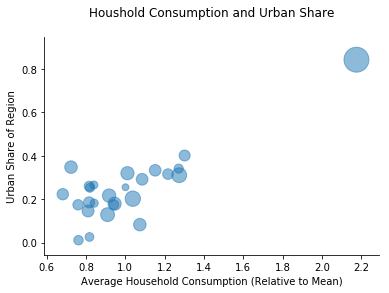

In [54]:
grouped = demo_tanz.groupby("region")

test = grouped.expmR.sum()/grouped.adulteq.sum()

frac_rural = grouped.urbam_num.mean()

size = grouped.expmR.count()

#print(size)

fig, ax = plt.subplots()

ax.scatter(test/test.mean(),frac_rural,s = size,alpha = 0.50)

ax.set_title("Houshold Consumption and Urban Share\n")
ax.set_ylabel("Urban Share of Region") 
ax.set_xlabel("Average Household Consumption (Relative to Mean)")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

#print(frac_rural)

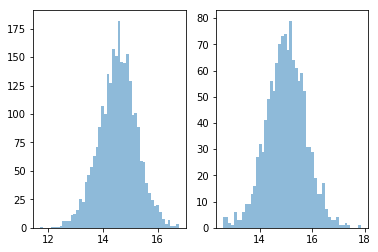

In [9]:
fig, ax = plt.subplots(1,2)

log_cons = np.log(demo_tanz["expmR"].dropna()) - np.log(demo_tanz["adulteq"].dropna())

ax[0].hist(np.log(grouped.get_group("Rural").expmR.dropna()), bins = 50, alpha = 0.5)

ax[1].hist(np.log(grouped.get_group("Urban").expmR.dropna()), bins = 50, alpha = 0.5)

plt.show()